In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

# Principal Component Analysis

### Example

Step1: Data $\rightarrow$Adjusted Data(data-mean)

In [108]:
x = [2.5,0.5,2.2,1.9,3.1,2.3,2,1,1.5,1.1]
y = [2.4,0.7,2.9,2.2,3.0,2.7,1.6,1.1,1.6,0.9]
original_data = pd.DataFrame({"x":x, "y":y})
original_data

,x,y
0,2.5,2.4
1,0.5,0.7
2,2.2,2.9
3,1.9,2.2
4,3.1,3.0
5,2.3,2.7
6,2.0,1.6
7,1.0,1.1
8,1.5,1.6
9,1.1,0.9


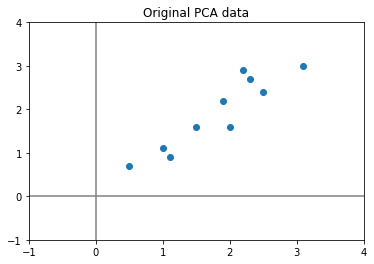

In [111]:
#Data
x = [2.5,0.5,2.2,1.9,3.1,2.3,2,1,1.5,1.1]
y = [2.4,0.7,2.9,2.2,3.0,2.7,1.6,1.1,1.6,0.9]
plt.scatter(x,y)
plt.xlim([-1, 4])
plt.ylim([-1, 4])
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.title("Original PCA data")
plt.show()

adjusted = $X^T$

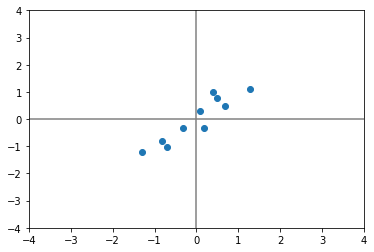

In [112]:
adjusted_x = x- np.mean(x)
adjusted_y = y - np.mean(y)
plt.scatter(adjusted_x,adjusted_y)
plt.xlim([-4, 4])
plt.ylim([-4,4])
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.show()

In [224]:
df = [[6,-3,-2,7],[-4,5,6,-3]]

In [226]:
import numpy as np
np.sum(np.cov(df))

1.3333333333333357

In [113]:
DataAdjust = pd.DataFrame({"x":adjusted_x,"y":adjusted_y})#교안과 일치
DataAdjust#X^T

,x,y
0,0.69,0.49
1,-1.31,-1.21
2,0.39,0.99
3,0.09,0.29
4,1.29,1.09
5,0.49,0.79
6,0.19,-0.31
7,-0.81,-0.81
8,-0.31,-0.31
9,-0.71,-1.01


Step2: Calculate the covariance matrix of X

In [221]:
X = DataAdjust.T

In [222]:
XXT = np.dot(X,X.T)#교안과 다름
XXT

array([[5.549, 5.539],
       [5.539, 6.449]])

In [223]:
(1/9)*XXT

array([[0.61655556, 0.61544444],
       [0.61544444, 0.71655556]])

In [121]:
XXT = np.cov(X)#교안과 같음

array([[0.61655556, 0.61544444],
       [0.61544444, 0.71655556]])

Step3: Calculate the eigenvectors and eigenvalues of $XX^T$

In [187]:
from numpy import linalg as LA
w, v = LA.eig(XXT)
S = [[],[]]#S는 V.T를 세로로 쭉쭉
for _ in range(len(w)):
    print("\nlambda {}(eigen value): {}".format(_,w[_]))
    print("transposed eigen vector {}: {}".format(_,v[_][::-1].T))#교안과 같게 맞춤 흑
    S[0].append(v[_][::-1].T[0])
    S[1].append(v[_][::-1].T[1])


lambda 0(eigen value): 0.04908339893832736
transposed eigen vector 0: [-0.6778734  -0.73517866]

lambda 1(eigen value): 1.2840277121727839
transposed eigen vector 1: [-0.73517866  0.6778734 ]


In [188]:
S

[[-0.6778733985280117, -0.735178655544408],
 [-0.735178655544408, 0.6778733985280117]]

In [192]:
k = np.argmax(w)
print("w:\n",w)
print("k:",k)
print("selected:\n",v[k][::-1])

w:
 [0.0490834  1.28402771]
k: 1
selected:
 [-0.73517866  0.6778734 ]


In [201]:
tmp_Y = np.dot(v[0][::-1],X)
print(v[0][::-1])
tmp_Y

[-0.6778734  -0.73517866]


array([-0.82797019,  1.77758033, -0.99219749, -0.27421042, -1.67580142,
       -0.9129491 ,  0.09910944,  1.14457216,  0.43804614,  1.22382056])

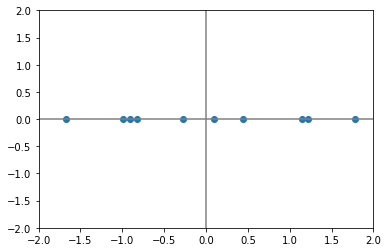

In [200]:

y = [0 for _ in range(10)]
plt.scatter(tmp_Y,y)
plt.xlim([-2, 2])
plt.ylim([-2,2])
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.show()#교안과 다름

In [202]:
#어쩔 수 없지
P = v[0][::-1]
plz_X = np.dot(P.T,Y)+np.mean(x)

In [203]:
plz_X#원래 대로 나오긴 함

array([2.5, 0.5, 2.2, 1.9, 3.1, 2.3, 2. , 1. , 1.5, 1.1])

In [204]:
x

[2.5, 0.5, 2.2, 1.9, 3.1, 2.3, 2, 1, 1.5, 1.1]

In [213]:
plz_Y = np.dot(P,Y)

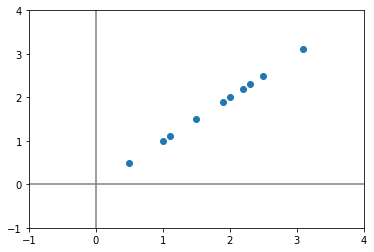

In [219]:
plt.scatter(plz_X, plz_Y+np.mean(x))
plt.xlim([-1, 4])
plt.ylim([-1, 4])
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.show()#오.. 된 것 같긴 한데 왜지?

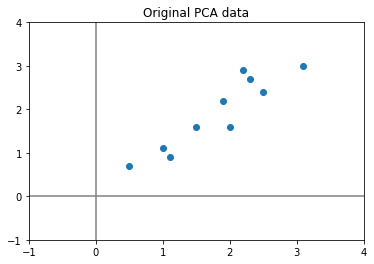

In [220]:
#Data
x = [2.5,0.5,2.2,1.9,3.1,2.3,2,1,1.5,1.1]
y = [2.4,0.7,2.9,2.2,3.0,2.7,1.6,1.1,1.6,0.9]
plt.scatter(x,y)
plt.xlim([-1, 4])
plt.ylim([-1, 4])
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.title("Original PCA data")
plt.show()

$Y = PX$

$P = S^T$

In [199]:
S = np.array(S)
P = S.T
P

array([[-0.6778734 , -0.73517866],
       [-0.73517866,  0.6778734 ]])

In [195]:
Y = np.dot(P,X)
Y

array([[-0.82797019,  1.77758033, -0.99219749, -0.27421042, -1.67580142,
        -0.9129491 ,  0.09910944,  1.14457216,  0.43804614,  1.22382056],
       [-0.17511531,  0.14285723,  0.38437499,  0.13041721, -0.20949846,
         0.17528244, -0.3498247 ,  0.04641726,  0.01776463, -0.16267529]])

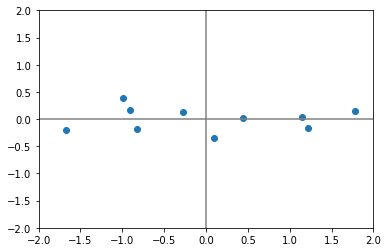

In [196]:
y_x = []
y_y = []
for _ in range(len(Y[1])):
    tmp_x = Y[0][_]
    tmp_y = Y[1][_]
    y_x.append(tmp_x)
    y_y.append(tmp_y)
plt.scatter(y_x,y_y)
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.show()

Step4: Choose k large eigenvalues and form a matrix with corresponding row eigenvectors<br>
<b>eigen value 기준으로 큰 거!!</b>

In [153]:
print("w:",w)
k = np.argmax(w)
print("k:",k)

w: [0.0490834  1.28402771]
k: 1


In [156]:
P = v[k][::-1]
P

array([-0.73517866,  0.6778734 ])

Step5: Transform Data

In [157]:
Y.T

array([[-0.82797019, -0.17511531],
       [ 1.77758033,  0.14285723],
       [-0.99219749,  0.38437499],
       [-0.27421042,  0.13041721],
       [-1.67580142, -0.20949846],
       [-0.9129491 ,  0.17528244],
       [ 0.09910944, -0.3498247 ],
       [ 1.14457216,  0.04641726],
       [ 0.43804614,  0.01776463],
       [ 1.22382056, -0.16267529]])

In [164]:
Y2 = np.dot(P,X)
print(P)
print(Y2)

[-0.73517866  0.6778734 ]
[-0.17511531  0.14285723  0.38437499  0.13041721 -0.20949846  0.17528244
 -0.3498247   0.04641726  0.01776463 -0.16267529]


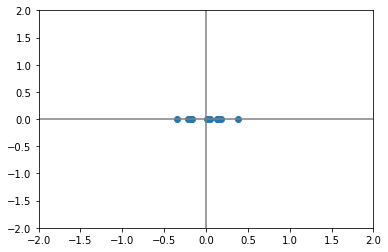

In [167]:

y = [0 for _ in range(10)]
plt.scatter(Y2,y)
plt.xlim([-2, 2])
plt.ylim([-2,2])
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.show()#교안과 다름

In [168]:
wt = np.dot([-0.6778734,  -0.73517866],X)
wt

array([-0.82797019,  1.77758033, -0.9921975 , -0.27421042, -1.67580143,
       -0.91294911,  0.09910944,  1.14457217,  0.43804614,  1.22382056])

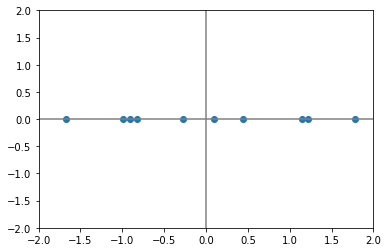

In [169]:

y = [0 for _ in range(10)]
plt.scatter(wt,y)
plt.xlim([-2, 2])
plt.ylim([-2,2])
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.show()#교안과 다름

In [75]:
Y

array([[-0.821868,  1.783632, -0.985968, -0.329088, -1.669668, -0.906768,
         0.105132,  1.150632,  0.444132,  1.229832],
       [-0.168315,  0.149085,  0.391185,  0.070935, -0.202515,  0.182085,
        -0.343215,  0.052785,  0.024285, -0.156315]])

10
[-0.821868  1.783632 -0.985968 -0.329088 -1.669668 -0.906768  0.105132
  1.150632  0.444132  1.229832]


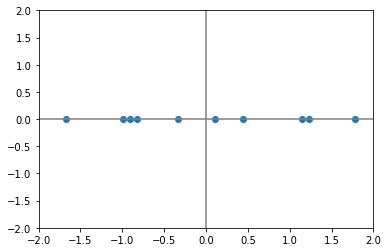

In [84]:
Y[0]
print(len(Y[0]))
print(Y[0])
plt.scatter(Y[0],y)
plt.xlim([-2, 2])
plt.ylim([-2,2])
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.show()

In [83]:
Y.T

array([[-0.821868, -0.168315],
       [ 1.783632,  0.149085],
       [-0.985968,  0.391185],
       [-0.329088,  0.070935],
       [-1.669668, -0.202515],
       [-0.906768,  0.182085],
       [ 0.105132, -0.343215],
       [ 1.150632,  0.052785],
       [ 0.444132,  0.024285],
       [ 1.229832, -0.156315]])

In [85]:
X

,0,1,2,3,4,5,6,7,8,9
x,0.681,-1.319,0.381,0.171,1.281,0.481,0.181,-0.819,-0.319,-0.719
y,0.490,-1.210,0.990,0.290,1.090,0.790,-0.310,-0.810,-0.310,-1.010


Get Back to Original Data

원래 데이터


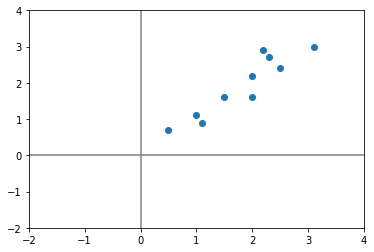

In [87]:
print("원래 데이터")
#Data
x = [2.5,0.5,2.2,1.99,3.1,2.3,2,1,1.5,1.1]
y = [2.4,0.7,2.9,2.2,3.0,2.7,1.6,1.1,1.6,0.9]
plt.scatter(x,y)
plt.xlim([-2, 4])
plt.ylim([-2, 4])
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.show()

In [98]:
print("After PCA")
print("P:\n",P,"\nY:\n",Y)
pca_X = np.dot(P.T,Y) #+ [np.mean(x),np.mean(y)]
pca_X[0] += np.mean(x)
pca_X[1] += np.mean(y)
pca_X

After PCA
P:
 [[-0.678 -0.735]
 [-0.735  0.678]] 
Y:
 [[-0.821868  1.783632 -0.985968 -0.329088 -1.669668 -0.906768  0.105132
   1.150632  0.444132  1.229832]
 [-0.168315  0.149085  0.391185  0.070935 -0.202515  0.182085 -0.343215
   0.052785  0.024285 -0.156315]]


array([[2.49993803, 0.50012003, 2.19996533, 1.98998444, 3.09988343,
        2.29995623, 1.99998353, 1.00007453, 1.50002903, 1.10006543],
       [2.39995541, 0.70011011, 2.89990991, 2.19997361, 2.99990081,
        2.69992811, 1.60002821, 1.10007371, 1.60002821, 0.90009191]])

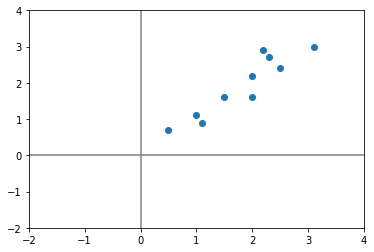

In [99]:
plt.scatter(pca_X[0],pca_X[1])
plt.xlim([-2, 4])
plt.ylim([-2, 4])
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.show()

In [103]:
Y[0]

array([-0.821868,  1.783632, -0.985968, -0.329088, -1.669668, -0.906768,
        0.105132,  1.150632,  0.444132,  1.229832])

In [15]:
x = [[6,-4],[-3,5],[-2,6],[7,-3]]
x = np.array(x)
x

array([[ 6, -4],
       [-3,  5],
       [-2,  6],
       [ 7, -3]])

In [16]:
import numpy as np
a = np.cov(x)
a

array([[ 50., -40., -40.,  50.],
       [-40.,  32.,  32., -40.],
       [-40.,  32.,  32., -40.],
       [ 50., -40., -40.,  50.]])

In [17]:
np.sum(a)

8.0

In [18]:
b = [[6,-3,-2,7],[-4,5,6,-3]]
b = np.array(b)
b

array([[ 6, -3, -2,  7],
       [-4,  5,  6, -3]])

In [19]:
c = np.cov(b)
c

array([[ 27.33333333, -26.66666667],
       [-26.66666667,  27.33333333]])

In [20]:
np.sum(c)

1.3333333333333357

In [21]:
k = [6,-3,-2,7,-4,5,6,-3]